In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statistics
from scipy.stats import skew
from scipy.stats import kurtosis


## Basic parameters

In [122]:
df = pd.read_csv("train.csv")

In [123]:
df.shape

(1460, 81)

In [124]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Check the important params stats

In [125]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [126]:
df.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Text(0, 0.5, 'SalePrice')

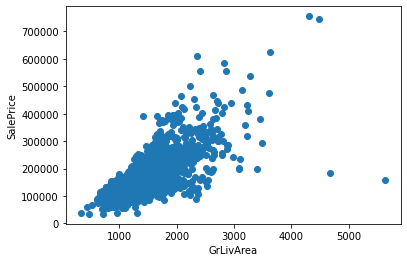

In [127]:
plt.scatter(df.GrLivArea, df.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

## Very simple model based on GrLivArea

58890.67026499164
0.5237041064277669


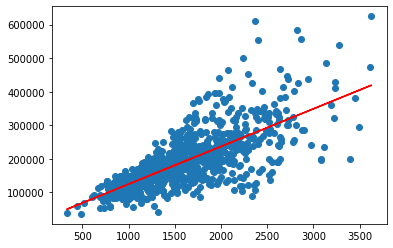

In [128]:
X_train_old = dict(zip(df.GrLivArea, df.SalePrice))
t_ = [key for key in X_train_old.keys() if key < 4000]
X_train_new = dict()
for t in t_:
    X_train_new[t] = X_train_old[t]
    
X, Y = list(X_train_new.keys()), list(X_train_new.values())
X, Y = np.array(X), np.array(Y)

X = np.reshape(X, (len(X), 1))
reg = LinearRegression()
reg = reg.fit(X, Y)

Y_pred = reg.predict(X)
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(rmse)
print(r2_score)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = "r")

## Checking other dependecies

Text(0, 0.5, 'SalePrice')

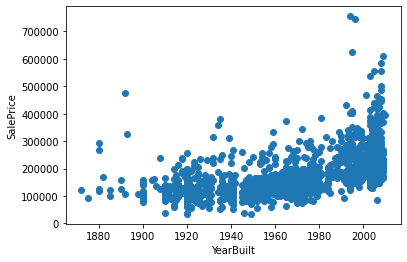

In [129]:
plt.scatter(df.YearBuilt, df.SalePrice)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

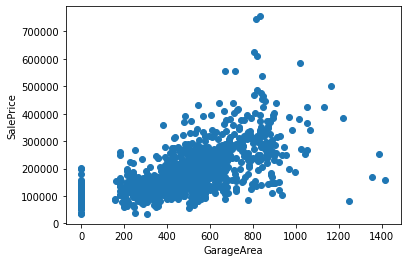

In [130]:
plt.scatter(df.GarageArea, df.SalePrice)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

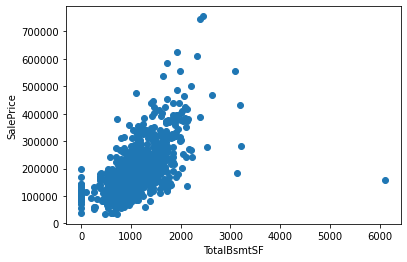

In [131]:
plt.scatter(df.TotalBsmtSF, df.SalePrice)
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

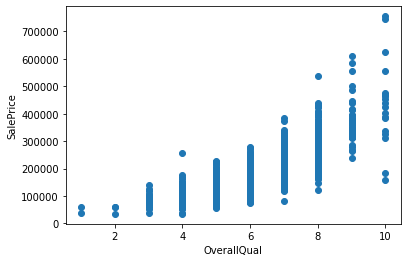

In [132]:
plt.scatter(df.OverallQual, df.SalePrice)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

Text(0, 0.5, 'GrLivArea')

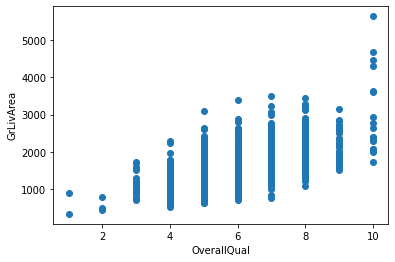

In [133]:
plt.scatter(df.OverallQual, df.GrLivArea)
plt.xlabel("OverallQual")
plt.ylabel("GrLivArea")

## Investigating types of values for the next data cleaning

In [134]:
np.unique(df.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [135]:
def segment_feature(dataset):
    cat_feat = set(filter(lambda x: dataset[x].dtype == "O", dataset.columns))
    num_feat = set(dataset.columns) - cat_feat
    return num_feat, cat_feat

numeric, categ = segment_feature(df)
cat_df = df[categ]
num_df = df[numeric]

len(numeric) + len(categ)

81

In [136]:
cat_df = cat_df.drop(["PoolQC"], axis="columns")
num_df = num_df.drop(["3SsnPorch"], axis="columns")

In [137]:
num_df_skew = num_df.apply(lambda x: skew(x.dropna()), axis=0)
num_df_kurtosis = num_df.apply(lambda x: kurtosis(x.dropna()), axis=0)

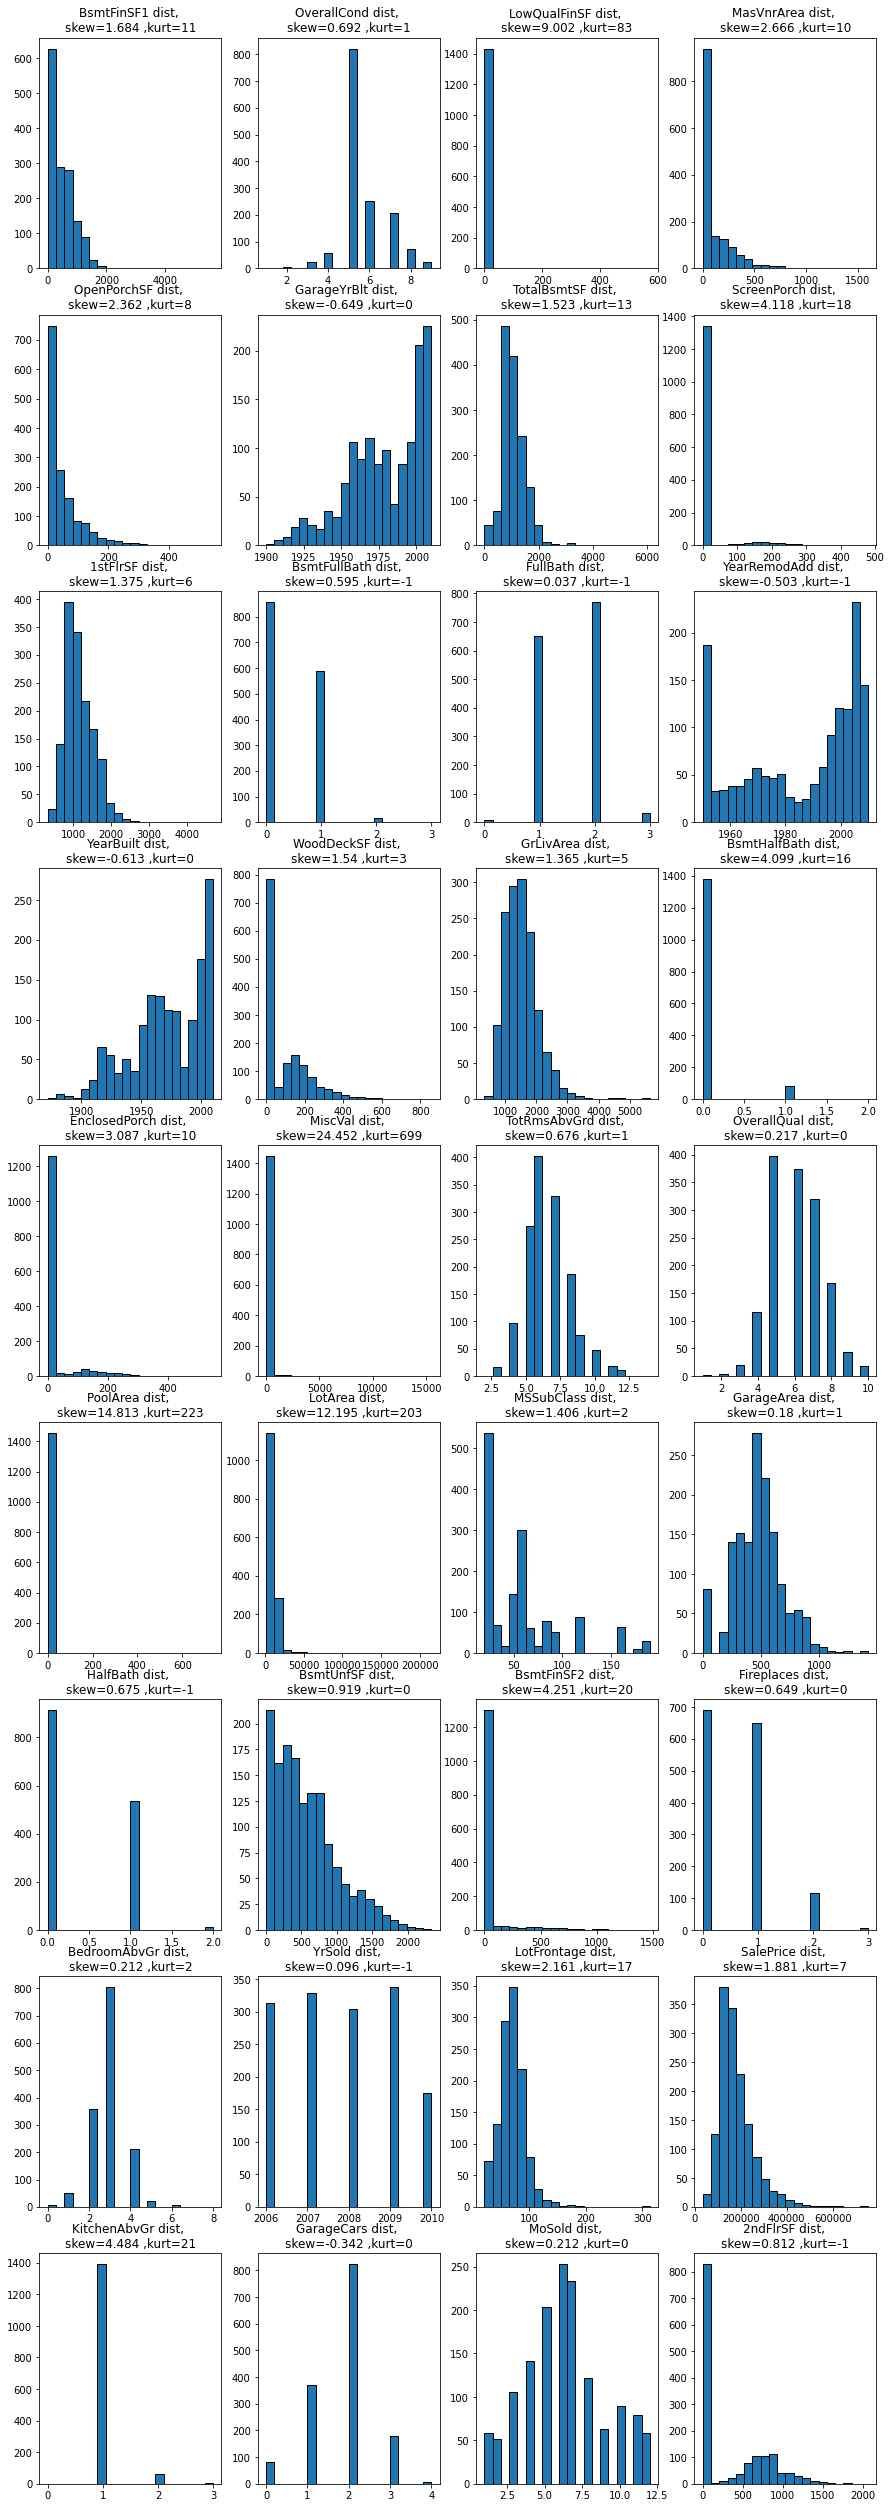

In [138]:
#smaller ver
h, w = (9, 4)
fig, axs = plt.subplots(h, w, figsize=(15, 45), frameon=False)

# everything except Id
cols = ['BsmtFinSF1', 'OverallCond', 'LowQualFinSF', 'MasVnrArea',
       'OpenPorchSF', 'GarageYrBlt', 'TotalBsmtSF', 'ScreenPorch', '1stFlrSF',
       'BsmtFullBath', 'FullBath', 'YearRemodAdd', 'YearBuilt',
       'WoodDeckSF', 'GrLivArea', 'BsmtHalfBath', 'EnclosedPorch', 'MiscVal',
       'TotRmsAbvGrd', 'OverallQual', 'PoolArea', 'LotArea', 'MSSubClass',
       'GarageArea', 'HalfBath', 'BsmtUnfSF', 'BsmtFinSF2', 'Fireplaces',
       'BedroomAbvGr', 'YrSold', 'LotFrontage', 'SalePrice', 'KitchenAbvGr',
       'GarageCars', 'MoSold', '2ndFlrSF']
cols_matr = np.reshape(cols, (h,w))
for i in range(h):
    for j in range(w):
        axs[i, j].hist(num_df[cols_matr[i, j]], edgecolor = 'black', bins=20)
        axs[i, j].set_title(f"{cols_matr[i, j]} dist, \nskew={round(num_df_skew[cols_matr[i,j]], 3)} ,kurt={round(num_df_kurtosis[cols_matr[i,j]])}")
#fig.savefig(f'all_dists.png')

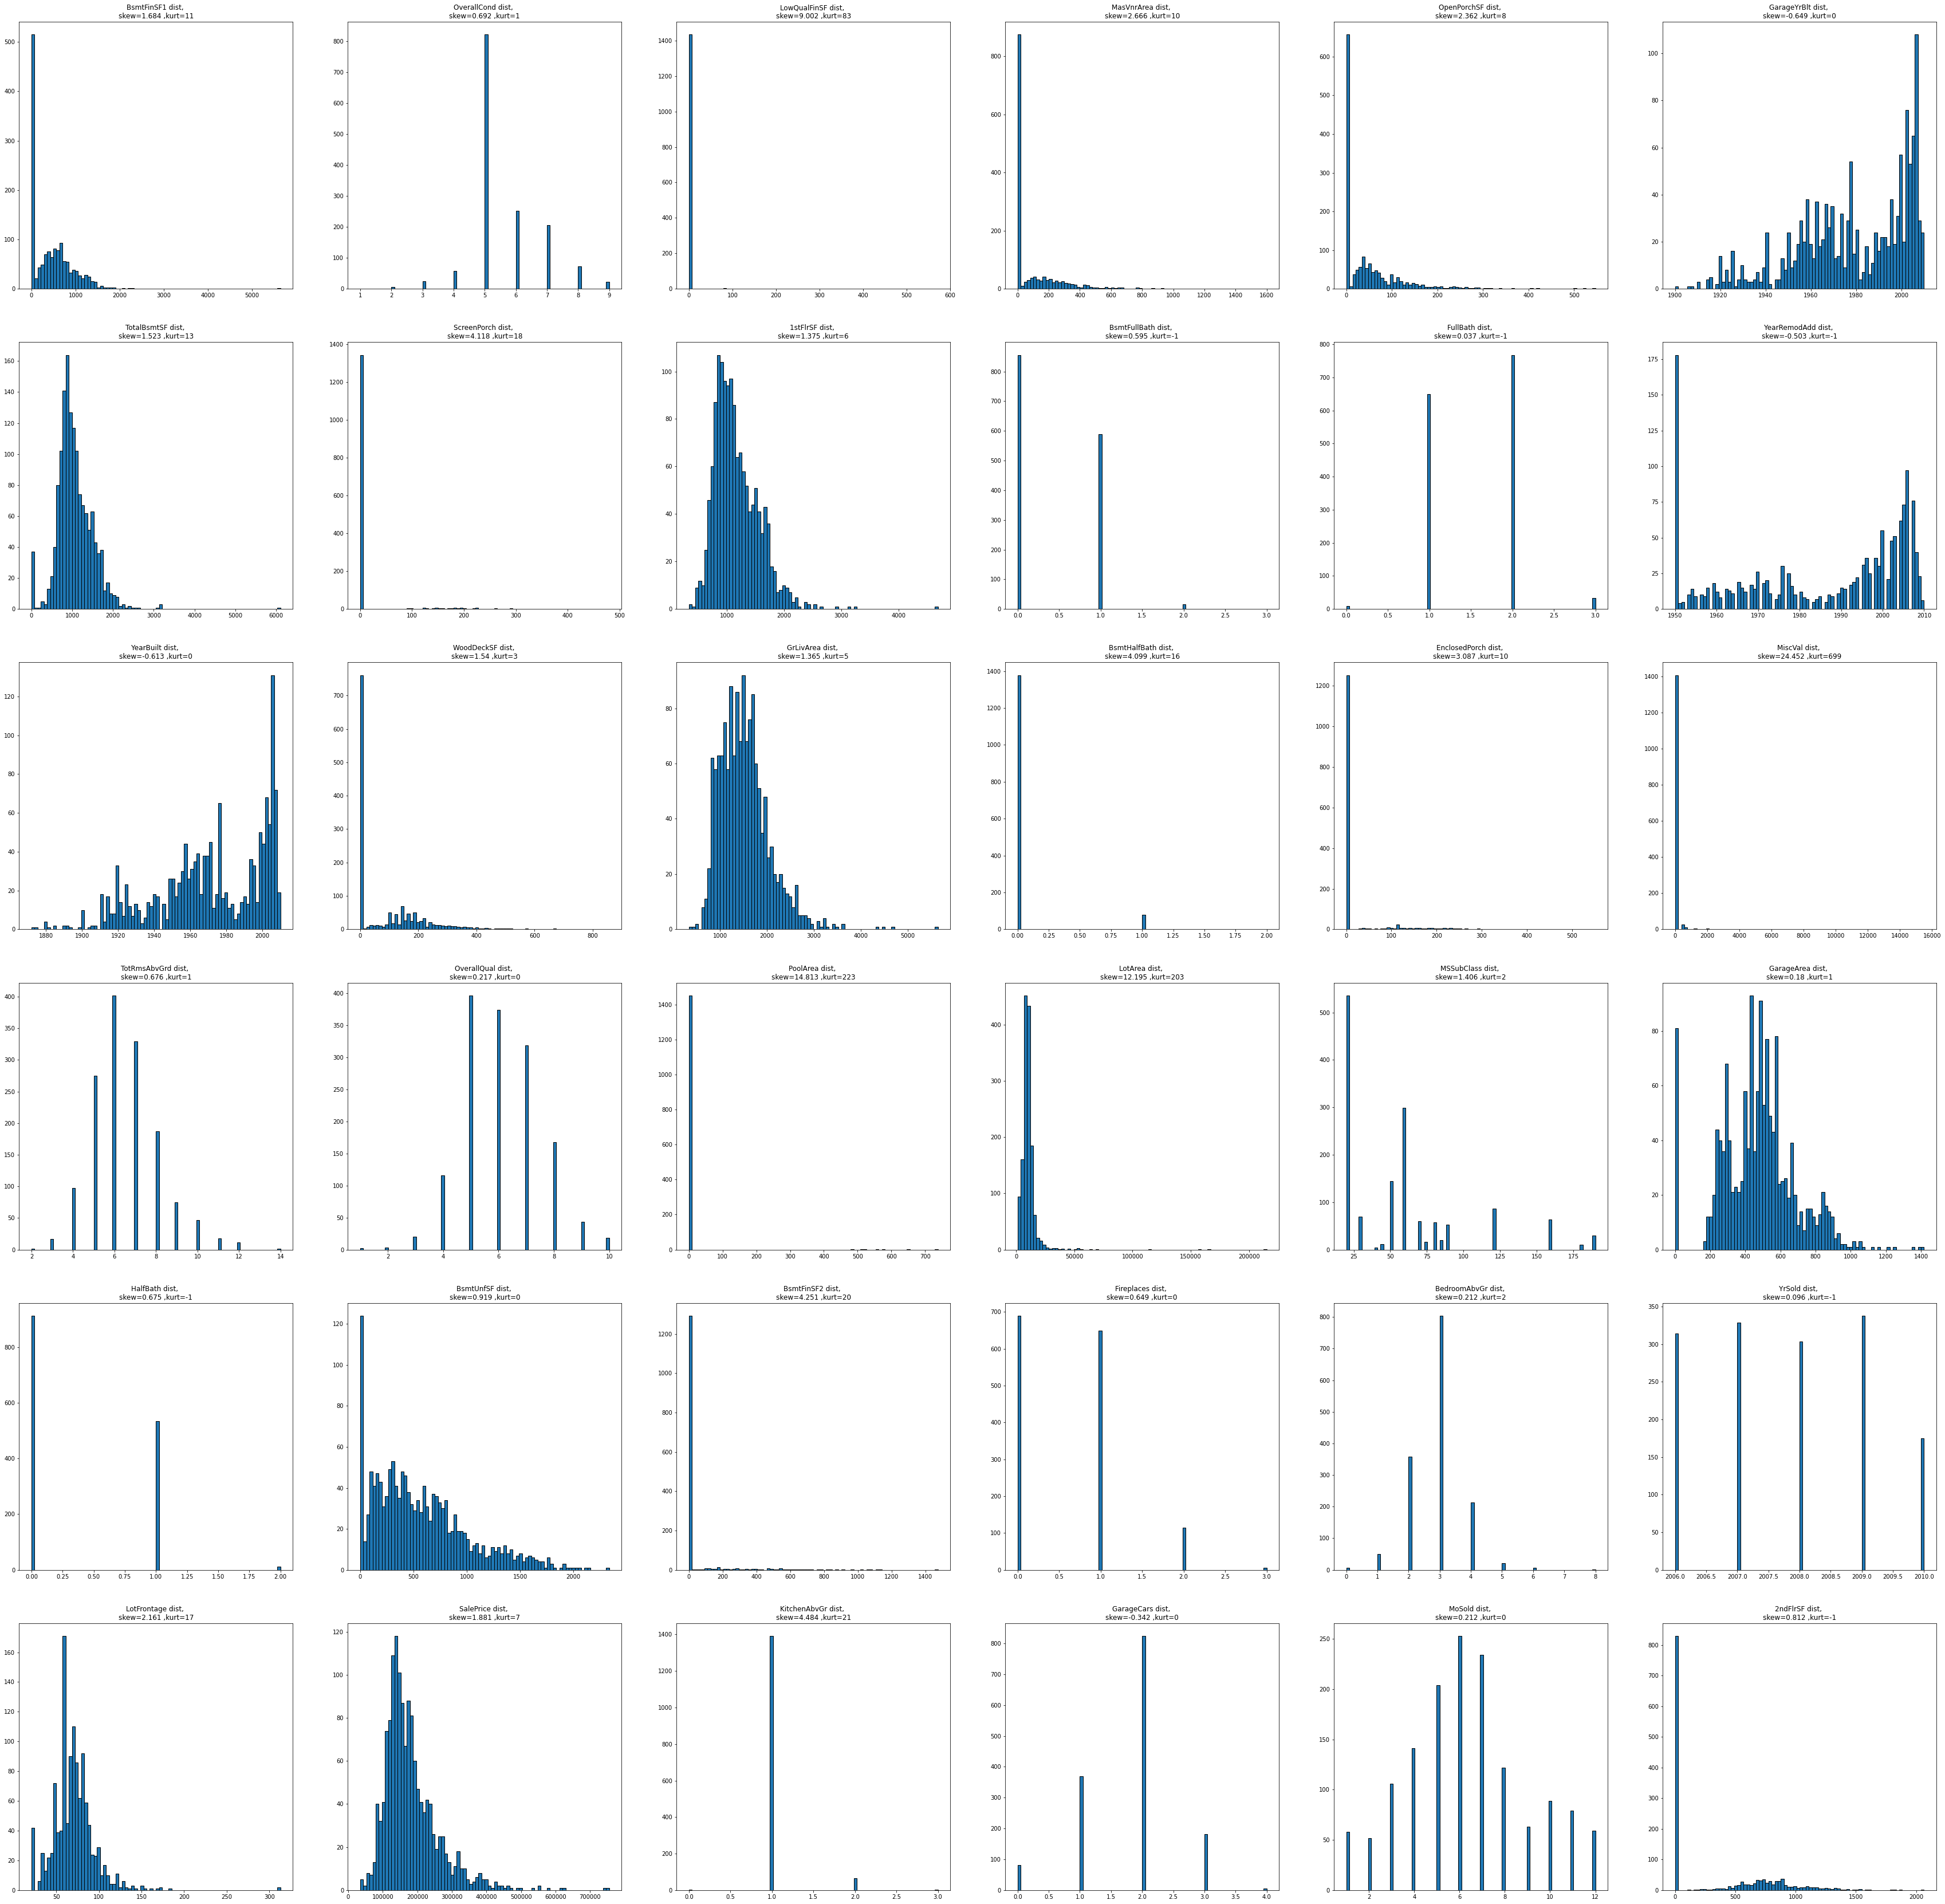

In [139]:
h, w = (6, 6)
fig, axs = plt.subplots(h, w, figsize=(60, 60), frameon=False)

# everything except Id
cols = ['BsmtFinSF1', 'OverallCond', 'LowQualFinSF', 'MasVnrArea',
       'OpenPorchSF', 'GarageYrBlt', 'TotalBsmtSF', 'ScreenPorch', '1stFlrSF',
       'BsmtFullBath', 'FullBath', 'YearRemodAdd', 'YearBuilt',
       'WoodDeckSF', 'GrLivArea', 'BsmtHalfBath', 'EnclosedPorch', 'MiscVal',
       'TotRmsAbvGrd', 'OverallQual', 'PoolArea', 'LotArea', 'MSSubClass',
       'GarageArea', 'HalfBath', 'BsmtUnfSF', 'BsmtFinSF2', 'Fireplaces',
       'BedroomAbvGr', 'YrSold', 'LotFrontage', 'SalePrice', 'KitchenAbvGr',
       'GarageCars', 'MoSold', '2ndFlrSF']
cols_matr = np.reshape(cols, (6,6))
for i in range(h):
    for j in range(w):
        axs[i, j].hist(num_df[cols_matr[i, j]], edgecolor = 'black', bins=80)
        axs[i, j].set_title(f"{cols_matr[i, j]} dist, skew={round(num_df_skew[cols_matr[i,j]], 3)}")
        axs[i, j].set_title(f"{cols_matr[i, j]} dist, \nskew={round(num_df_skew[cols_matr[i,j]], 3)} ,kurt={round(num_df_kurtosis[cols_matr[i,j]])}")
fig.savefig(f'all_dists_start.png')  # to render plots 

Skew=1.365155954773434


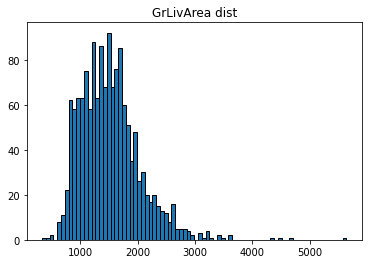

In [140]:
plt.hist(num_df.GrLivArea, edgecolor = 'black', bins=80)
plt.title("GrLivArea dist")
print(f"Skew={num_df_skew.GrLivArea}")

## Data prescence 

<AxesSubplot:>

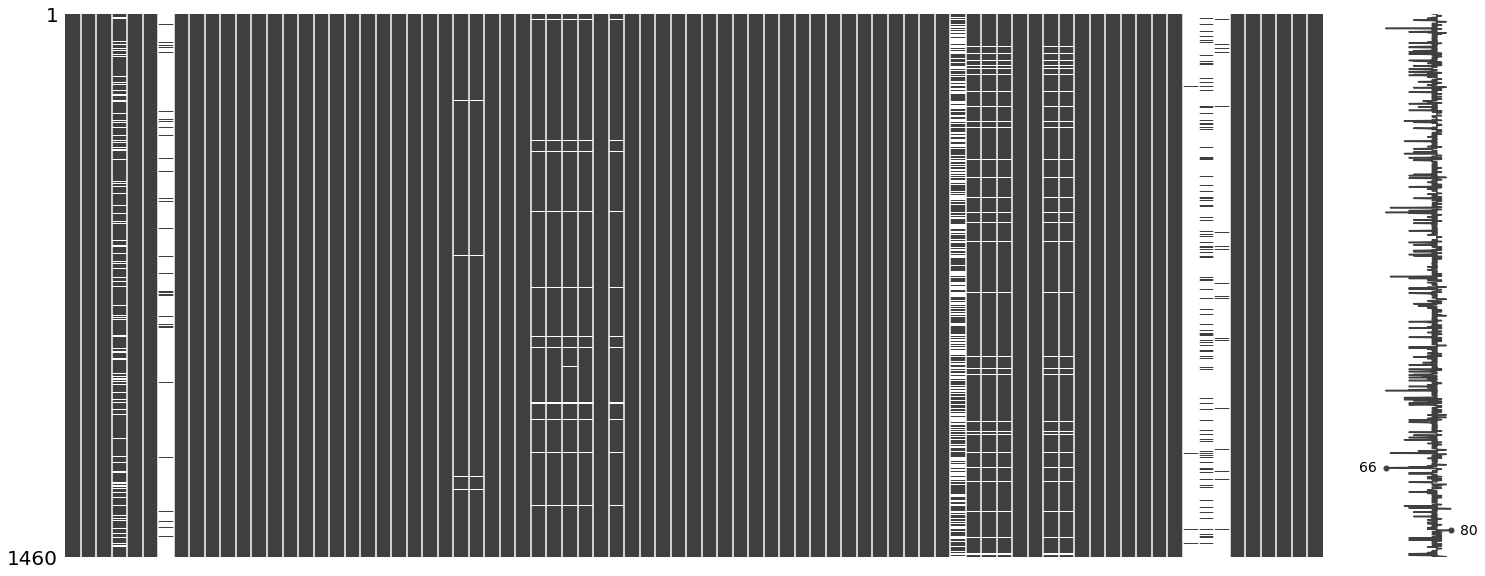

In [141]:
msno.matrix(df)

<AxesSubplot:>

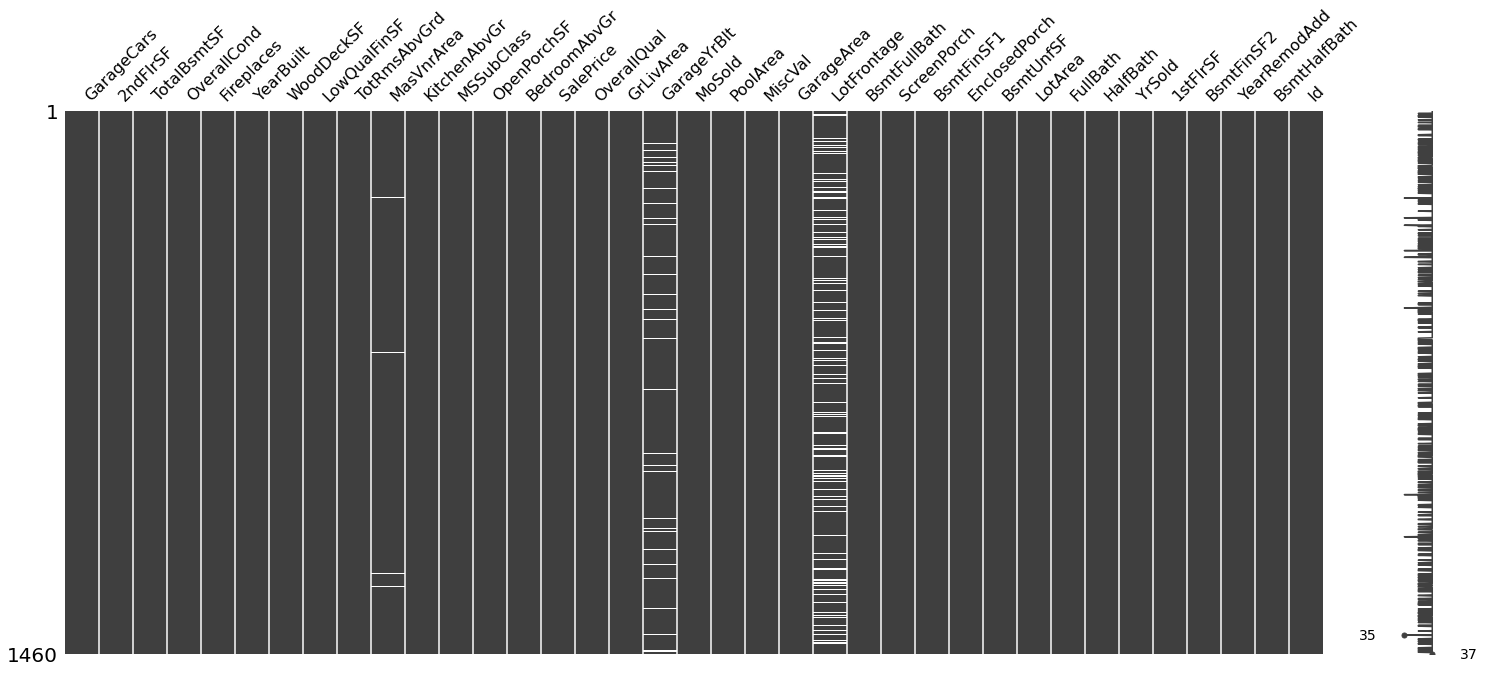

In [142]:
msno.matrix(num_df)
#plt.savefig("num_data_pres.png", dpi=200)

<AxesSubplot:>

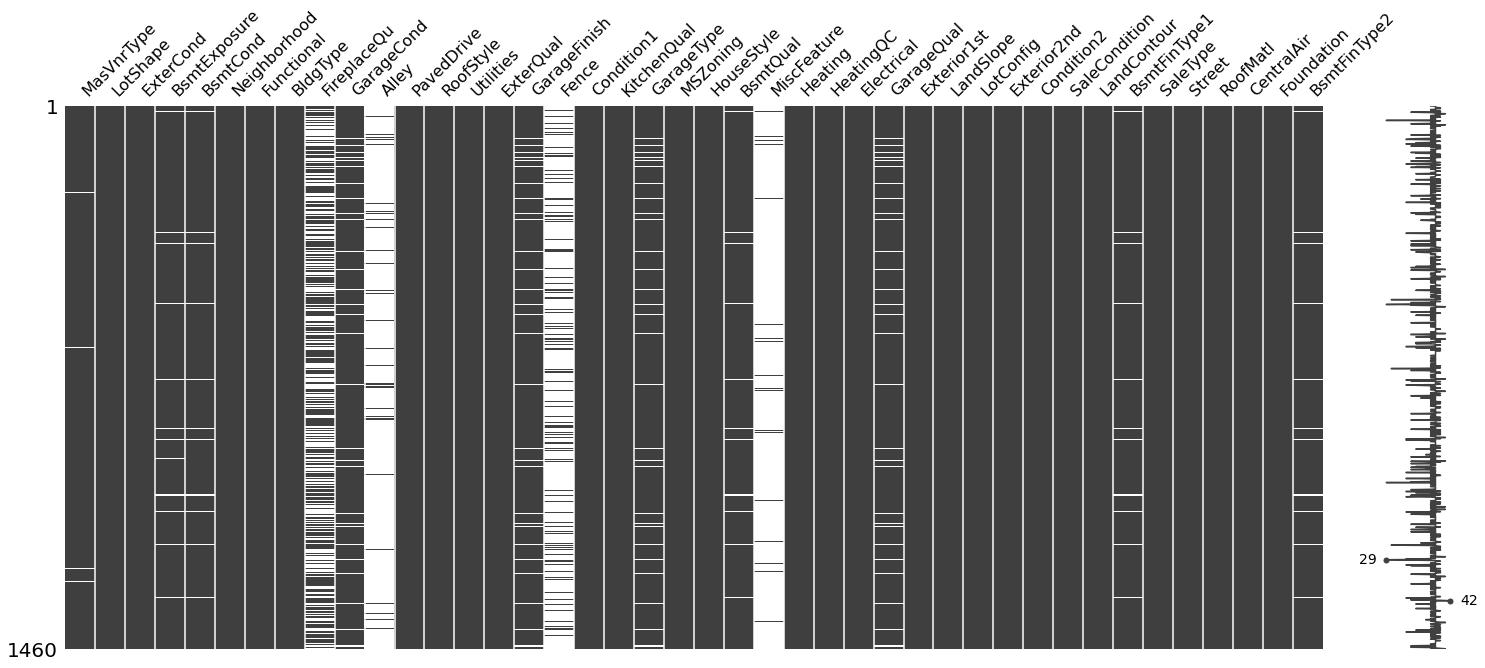

In [143]:
msno.matrix(cat_df)